In [91]:
## extract results functions

def extract_results_from_log(file_path, dataset_name):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    if dataset_name == "mme":
        r_idx = 0
        perception_results = []
        cognition_results = []
        for line in lines:
            if line.startswith("total score: "):
                score = line.replace("total score: ", "").strip()
                score = float(score)
                if r_idx % 2 == 0:
                    perception_results.append(score)
                else:
                    cognition_results.append(score)
                r_idx += 1
        avg_percp = sum(perception_results) / len(perception_results)
        avg_cogn = sum(cognition_results) / len(cognition_results)
        
        perception_results = [f"{score:.2f}" for score in perception_results]
        cognition_results = [f"{score:.2f}" for score in cognition_results]
        avg_percp = f"{avg_percp:.2f}"
        avg_cogn = f"{avg_cogn:.2f}"
        perc_string = "+".join(perception_results)
        cogn_string = "+".join(cognition_results)
        result_str = f"({perc_string})/3={avg_percp}|({cogn_string})/3={avg_cogn}"
        return result_str

    elif dataset_name == "llava_bench":
        results = []
        for line in lines:
            if line.startswith("all "):
                score = line.split(" ")[1]
                score = float(score)
                results.append(score)
        avg = sum(results) / len(results)
        results = [f"{score:.2f}" for score in results]
        avg = f"{avg:.2f}"
        score_str = "+".join(results)
        result_str = f"({score_str})/3={avg}"
        return result_str
    
    elif dataset_name == "mmbench":
        return ""
    
    elif dataset_name == "mmvet":
        return ""
    
    elif dataset_name == "seed":
        for line in lines:
            if line.startswith("image accuracy: "):
                score = line.replace("image accuracy: ", "").strip()
                score = score.replace("%", "")
                score = float(score)
                return score

    elif dataset_name == "gqa":
        for line in lines:
            if line.startswith("Accuracy: "):
                score = line.replace("Accuracy: ", "").strip()
                score = score.replace("%", "")
                score = float(score)
                return score
    elif dataset_name == "sqa":
        # Total: 4241, Correct: 2970, Accuracy: 70.03%, IMG-Accuracy: 69.11%
        for line in lines:
            if line.startswith("Total: "):
                acc = line.split(" Accuracy: ")[1]
                acc = acc.split("%")[0]
                img_acc = line.split(" IMG-Accuracy: ")[1]
                img_acc = img_acc.split("%")[0]
                return f"{acc}|{img_acc}"
    
    elif dataset_name == "pope":
        results = []
        for line in lines:
            if line.startswith("Accuracy: "):
                score = line.replace("Accuracy: ", "").strip()
                score = float(score)
                score = score * 100
                results.append(f"{score:.2f}")
        return "|".join(results)
    
    elif dataset_name == "textvqa":
        for line in lines:
            if line.startswith("Accuracy: "):
                score = line.replace("Accuracy: ", "").strip()
                score = score.replace("%", "")
                score = float(score)
                return score
    else:
        raise ValueError(f"Unknown dataset name: {dataset_name}")

In [15]:
import os
from glob import glob

first_line_datasets = [
    "mme",
    "llava_bench",
    "mmbench",
    "mmvet",
    "seed"
]
second_line_datasets = [
    "gqa",
    "sqa",
    "textvqa",
    "pope"
]


## clip
input_log_dirs = [
    # "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/LLaVA/results/eval_logs/instance_level-72out__pretrained_openai__schedule-constant",
    # "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/LLaVA/results/eval_logs_repeat_token/rerun_new_repeat__instance_level-72out__pretrained_openai__schedule-constant",
    # "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/LLaVA/results/eval_logs_repeat_token/rerun_new_repeat__instance_level-192out__pretrained_openai__schedule-constant",
    # "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/LLaVA/results/eval_logs_repeat_token/clsbugfix_apply_thresh_to_pretrained-72out_no_repeat",
    "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/LLaVA/results/eval_logs_repeat_token/rerun_rerun_new_repeat__clsbugfix_apply_thresh_to_pretrained-72out_repeat",
    "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/LLaVA/results/eval_logs_repeat_token/rerun_rerun_new_repeat__clsbugfix_apply_thresh_to_pretrained-192out_repeat",
    "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/LLaVA/results/eval_logs_repeat_token/rerun_rerun_new_repeat__clsbugfix_apply_thresh_to_pretrained-384out_repeat",
    # "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/LLaVA/results/eval_logs_repeat_token/rerun_rerun_new_repeat__clsbugfix_apply_thresh_to_pretrained-480out_repeat",
    "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/LLaVA/results/eval_logs_repeat_token/rerun_rerun_new_repeat__apply_thresh_to_pretrained-192out_repeat_schedule-linear",
    "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/LLaVA/results/eval_logs_repeat_token/rerun_rerun_new_repeat__apply_thresh_to_pretrained-192out_repeat_schedule-rev-linear",
    "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/LLaVA/results/eval_logs_repeat_token/rerun_rerun_new_repeat__clsbugfix_apply_thresh_to_pretrained-192out_repeat_pixmo"
    # "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/LLaVA/results/eval_logs_repeat_token/no_repeat__instance_level-192out__pretrained_openai__schedule-constant",
    # "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/LLaVA/results/eval_logs_repeat_token/no_repeat__instance_level-384out__pretrained_openai__schedule-constant"
]
layer_idx = 22


# ## siglip
# input_log_dirs = [
#     "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/LLaVA/results/eval_logs_repeat_token/rerun_no_repeat__siglip_instance_level-72out",
#     "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/LLaVA/results/eval_logs_repeat_token/rerun_new_repeat__siglip_instance_level-72out",
#     "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/LLaVA/results/eval_logs_repeat_token/rerun_rerun_new_repeat__siglip_apply_thresh_to_pretrained-72out_repeat",
#     "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/LLaVA/results/eval_logs_repeat_token/rerun_rerun_new_repeat__siglip_apply_thresh_to_pretrained-192out_repeat",
#     "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/LLaVA/results/eval_logs_repeat_token/rerun_rerun_new_repeat__siglip_apply_thresh_to_pretrained-384out_repeat",
#     # "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/LLaVA/results/eval_logs_repeat_token/siglip_apply_thresh_to_pretrained-480out_repeat"
# ]
# layer_idx = 10

In [93]:
## visualize results
output_tsv_file = "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/LLaVA/results/summary_tsv_files/summary.tsv"
write_lines = []

for input_log_dir in input_log_dirs:
    write_lines.append("#######################")
    write_lines.append("Model: " + input_log_dir.split("/")[-1] + "\n")

    header_line = ""
    results_line = ""
    for dataset in first_line_datasets:
        header_line += f"{dataset}\t"
        log_file_path = os.path.join(input_log_dir, f"{dataset}.log")
        if os.path.exists(log_file_path):
            result_str = extract_results_from_log(log_file_path, dataset)
            results_line += f"{result_str}\t"
        else:
            results_line += "N/A\t"
    write_lines.append(header_line)
    write_lines.append(results_line+"\n")

    header_line = ""
    results_line = ""
    for dataset in second_line_datasets:
        log_file_path = os.path.join(input_log_dir, f"{dataset}.log")
        header_line += f"{dataset}\t"
        if os.path.exists(log_file_path):
            result_str = extract_results_from_log(log_file_path, dataset)
            results_line += f"{result_str}\t"
        else:
            results_line += "N/A\t"
    write_lines.append(header_line)
    write_lines.append(results_line)
    write_lines.append("#######################\n")

with open(output_tsv_file, 'w') as f:
    f.writelines("\n".join(write_lines))
print(f"Results written to {output_tsv_file}")


Results written to /shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/LLaVA/results/summary_tsv_files/summary.tsv


In [16]:
# Visualize tok number
import json
from collections import defaultdict
def show_ntok_stats_from_jsonl(input_ans_jsonl, layer_idx):
    with open(input_ans_jsonl, "r") as f:
        answers = [json.loads(line) for line in f]
    ntoks_all_instance = []
    for ans in answers:
        if ans["metadata"]["ntok_instance"] is None:
            continue
        ntoks_all_instance.append(ans["metadata"]["ntok_instance"][f"block_{layer_idx}_ntoks"])
    
    ntok_max =  max(ntoks_all_instance)
    ntok_min = min(ntoks_all_instance)
    ntok_avg = sum(ntoks_all_instance) / len(ntoks_all_instance)
    ntok_med = sorted(ntoks_all_instance)[len(ntoks_all_instance) // 2]
    ntok_std = (sum([(ntok - ntok_avg) ** 2 for ntok in ntoks_all_instance]) / len(ntoks_all_instance)) ** 0.5

    # stat_str = f"Max:{ntok_max}, Min:{ntok_min}, Avg:{ntok_avg:.2f}, Med:{ntok_med}, Std:{ntok_std:.2f}"
    stat_str = f"{ntok_max}|{ntok_min}|{ntok_avg:.1f}|{ntok_med}|{ntok_std:.1f}"
    return stat_str, {"max": ntok_max, "min": ntok_min, "avg": ntok_avg, "med": ntok_med, "std": ntok_std}

def find_jsonl(dataset_name, model_name, eval_root="/shared/nas2/wangz3/salesforce_intern_nas2/llava_1_5_data/eval"):
    if dataset_name == "mme":
        p = os.path.join(eval_root, "MME", "answers", f"{model_name}.jsonl")
        if not os.path.exists(p):
            p = os.path.join(eval_root, "MME", "answers", f"{model_name}_1.jsonl")
    elif dataset_name == "llava_bench":
        p = os.path.join(eval_root, "llava-bench-in-the-wild", "answers", f"{model_name}.jsonl")
        if not os.path.exists(p):
            p = os.path.join(eval_root, "llava-bench-in-the-wild", "answers", f"{model_name}_1.jsonl")
    elif dataset_name == "mmbench":
        p = os.path.join(eval_root, "mmbench/answers/mmbench_dev_20230712", f"{model_name}.jsonl")
    elif dataset_name == "mmvet":
        p = os.path.join(eval_root, "mm-vet/answers", f"{model_name}.jsonl")
    elif dataset_name == "seed":
        p = os.path.join(eval_root, "seed_bench/answers", f"{model_name}", "merge.jsonl")
    elif dataset_name == "gqa":
        p = os.path.join(eval_root, "gqa/answers/llava_gqa_testdev_balanced", f"{model_name}", "merge.jsonl")
    elif dataset_name == "sqa":
        p = os.path.join(eval_root, "scienceqa/answers", f"{model_name}.jsonl")
    elif dataset_name == "pope":
        p = os.path.join(eval_root, "pope/answers", f"{model_name}.jsonl")
    elif dataset_name == "textvqa":
        p = os.path.join(eval_root, "textvqa/answers", f"{model_name}.jsonl")
    else:
        raise ValueError(f"Unknown dataset name: {dataset_name}")
    return p

output_tsv_file_ntok = "/shared/nas2/wangz3/salesforce_intern_nas2/open_clip_merging/LLaVA/results/summary_tsv_files/summary_ntok.tsv"

write_lines = []


for input_log_dir in input_log_dirs:
    model_name = input_log_dir.split("/")[-1]
    write_lines.append("#######################")
    write_lines.append("Model: " + model_name + "\n")
    stats_all_datasets = defaultdict(list)

    header_line = ""
    results_line = ""
    for dataset in first_line_datasets:
        header_line += f"{dataset}\t"
        log_file_path = os.path.join(input_log_dir, f"{dataset}.log")
        if os.path.exists(log_file_path):
            jsonl_path = find_jsonl(dataset, model_name)
            result_str, info = show_ntok_stats_from_jsonl(jsonl_path, layer_idx)
            results_line += f"{result_str}\t\t"
            for k, v in info.items():
                stats_all_datasets[k].append(v)
        else:
            results_line += "N/A\t\t"
    write_lines.append(header_line)
    write_lines.append(results_line+"\n")

    header_line = ""
    results_line = ""
    for dataset in second_line_datasets:
        log_file_path = os.path.join(input_log_dir, f"{dataset}.log")
        header_line += f"{dataset}\t"
        if os.path.exists(log_file_path):
            jsonl_path = find_jsonl(dataset, model_name)
            result_str, info = show_ntok_stats_from_jsonl(jsonl_path, layer_idx)
            results_line += f"{result_str}\t\t"
            for k, v in info.items():
                stats_all_datasets[k].append(v)
        else:
            results_line += "N/A\t\t"
    write_lines.append(header_line)
    write_lines.append(results_line)
    write_lines.append("#######################\n")

    # show avg stats all datasets #
    print(f"Model: {model_name} | Stats for all datasets:")
    for k, v in stats_all_datasets.items():
        avg = sum(v) / len(v)
        print(f"{k}: {avg:.2f}")

with open(output_tsv_file_ntok, 'w') as f:
    f.writelines("\n".join(write_lines))
print(f"Results written to {output_tsv_file_ntok}")


Model: rerun_rerun_new_repeat__clsbugfix_apply_thresh_to_pretrained-72out_repeat | Stats for all datasets:
max: 195.11
min: 20.33
avg: 89.44
med: 88.11
std: 27.33
Model: rerun_rerun_new_repeat__clsbugfix_apply_thresh_to_pretrained-192out_repeat | Stats for all datasets:
max: 353.22
min: 61.33
avg: 194.77
med: 194.00
std: 47.42
Model: rerun_rerun_new_repeat__clsbugfix_apply_thresh_to_pretrained-384out_repeat | Stats for all datasets:
max: 536.89
min: 199.22
avg: 393.63
med: 395.56
std: 57.49
Model: rerun_rerun_new_repeat__apply_thresh_to_pretrained-192out_repeat_schedule-linear | Stats for all datasets:
max: 310.44
min: 39.78
avg: 162.76
med: 161.67
std: 43.30
Model: rerun_rerun_new_repeat__apply_thresh_to_pretrained-192out_repeat_schedule-rev-linear | Stats for all datasets:
max: 375.00
min: 80.44
avg: 213.80
med: 213.67
std: 48.84
Model: rerun_rerun_new_repeat__clsbugfix_apply_thresh_to_pretrained-192out_repeat_pixmo | Stats for all datasets:
max: 227.11
min: 38.89
avg: 119.88
med: 11

In [2]:
# compute ntok avg stats

llava_name = "Llava-1.5 w/ CLIP (Original)"
ours_72out_name = "Llava-1.5 w/ DyMU-low"
ours_192out_name = "Llava-1.5 w/ DyMU-mid"
ours_384out_name = "Llava-1.5 w/ DyMU-high"

performance = {
    llava_name: 55.8,
    ours_72out_name: 54.5,
    ours_192out_name: 55.3,
    ours_384out_name: 56.0,
    # "tome-72out":
    # "tome-192out":
    # "tome-72out":
}

# avg, std
ntok = {
    llava_name: [576, 0],
    ours_72out_name: [89.4, 27.3],
    ours_192out_name: [194.8, 47.4],
    ours_384out_name: [393.6, 57.5]
}

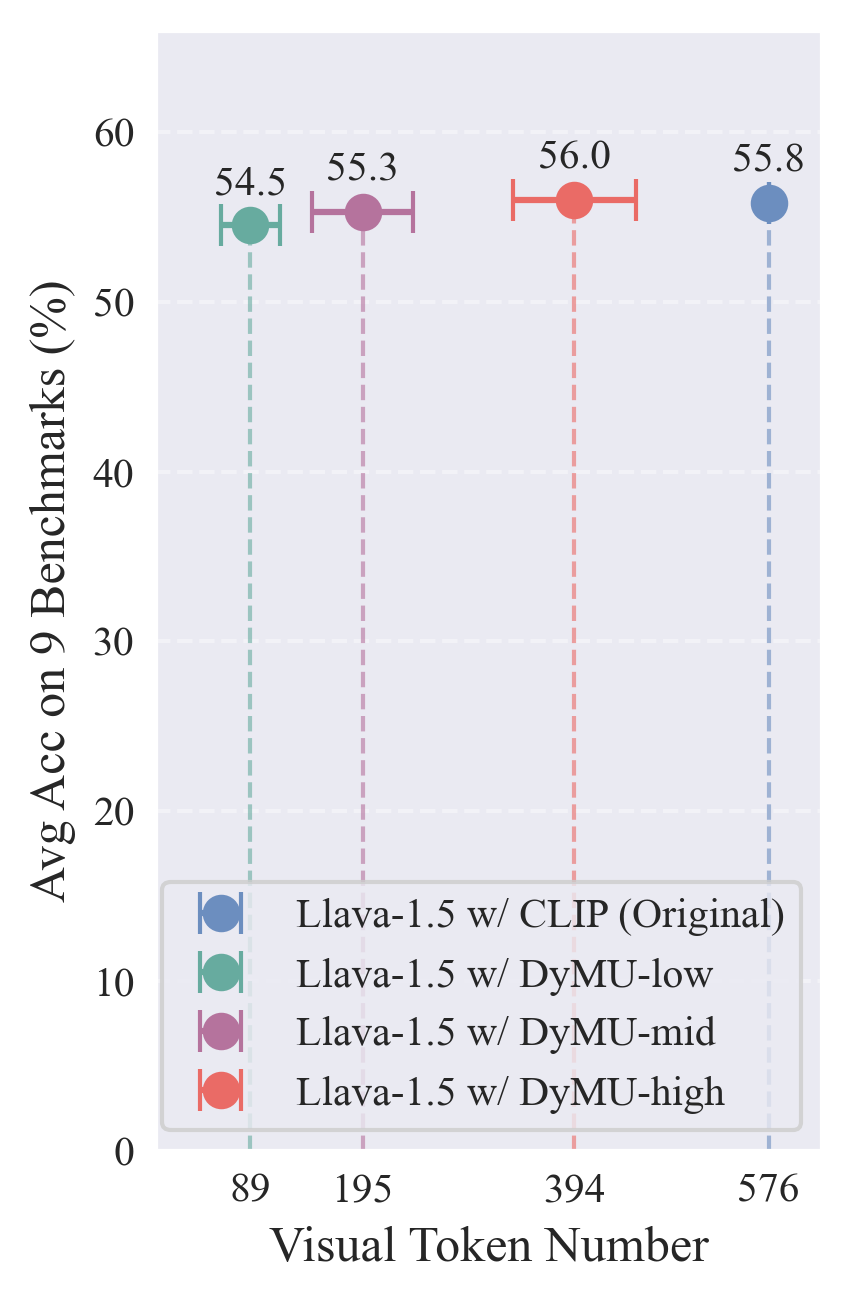

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use Seaborn theme
sns.set_theme()

methods = performance.keys()
# Extract values
avg_performance = [performance[m] for m in methods]
avg_tokens = [ntok[m][0] for m in methods]
std_tokens = [ntok[m][1] for m in methods]

# palette = sns.color_palette("pastel")  # Use Seaborn's pastel color palette

colors = {
    llava_name: "#6C8EBF",
    ours_72out_name: "#67AB9F",
    ours_192out_name: "#B5739D",
    ours_384out_name: "#EA6B66"
}


# Create plot
plt.figure(figsize=(3, 4.5), dpi=300)

# Plot each method separately so that original_llava is not connected to ours-72out
for i, method in enumerate(methods):
    plt.errorbar(avg_tokens[i], avg_performance[i], xerr=std_tokens[i], 
                 fmt='o', capsize=5, color=colors[method], label=method,
                 markersize=8)
    
    # Add vertical dashed line that stops at the data point
    plt.vlines(x=avg_tokens[i], ymin=0, ymax=avg_performance[i] - 1, linestyle="--", color=colors[method], alpha=0.6, linewidth=1)

    # Add labels near points
    plt.annotate(f"{avg_performance[i]:.1f}", (avg_tokens[i], avg_performance[i]), 
                 textcoords="offset points", xytext=(0, 7.5), ha='center', fontsize=10, fontname="Times New Roman")
    
    # Add annotation for avg token number
    plt.annotate(f"{avg_tokens[i]:.0f}", (avg_tokens[i], 0), 
                 textcoords="offset points", xytext=(0, -12), ha='center', fontsize=10, fontname="Times New Roman")

# Formatting
plt.xlabel("Visual Token Number", fontsize=12, fontname="Times New Roman", labelpad=18)
plt.ylabel("Avg Acc on 9 Benchmarks (%)", fontsize=12, fontname="Times New Roman")
plt.xticks(fontsize=10, fontname="Times New Roman")
plt.yticks(fontsize=10, fontname="Times New Roman")
plt.ylim(0, max(avg_performance) + 10)  # Start from 0 for performance axis
plt.xlim(0, 576 + 50)  # Start from 0 for performance axis

ax = plt.gca()  # Get the current axis
ax.yaxis.set_tick_params(pad=-1)  # Decrease pad value to move ticks closer

# plt.tick_params(axis='both', which='both', length=0)  # Remove ticks
plt.xticks([], [])
# plt.tick_params(axis='y', which='y', length=0)  # Remove ticks
# plt.yticks([], [])


plt.grid(True, linestyle="--", alpha=0.4)
legend = plt.legend(loc="lower right", fontsize=10)
for text in legend.get_texts():
    text.set_fontname("Times New Roman")

plt.tight_layout()
plt.show()